## EDA (Exploratory Data Analysis) on Madrid Daily Weather dataset

1.Load the datasets

2.Clean data(missing values,duplicates,types)

3.Treat Outliers.

4.Univariate,Bivariate and multivariate analysis

5.Insights 

### Outlier: A data point that is significantly different from other observations in a dataset.

### How outliers will come---?

1.Measurement errors

2.Data entry mistakes

### Why they are important---?

1.They can be errors

2.They effect the data analysis

### How to identify the outliers---?

1.Statiscal methods

---->Interquartile Range(IQR)

---->Z-score

2.Visualization techniques

---->Box Plots

---->Scatter plots

---->Histograms


### Univariate analysis - a method that analyzes a single variable to describe its characteristics,finding patterns and summarize data.
####  It involves only one variable.

### Bivariate analysis - it will give the relationship between 2 variables.It helps to find if there is an correlation ,association or any connection between the 2 variables
#### It involves 2 variables(x & y)

### Multivariate analysis- to understand how multiple factors interact and influence each other.
#### It involves more than 2 variables
Example -
How our age,income and education level together influence the purchasing behaviour.





### ETL (Extract Transform Load)

### ELT

## EDA: <Dataset>

1. Load  & overview 

2. Cleaning(missing,dupes,dtypes)

3. Uni,Bi & Multi analysis

4. Outlier - IQR 

5. Feature Engineering

6. Key Insights

### Feature Engineering - "Feature Engineering is the process of turning raw data into useful features" that helps to improve the performance of machine learning models.

In [1]:
# 1.Load libraries & Dataset
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Madrid Daily Weather 1997-2015.csv")
df.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.0,5.0,Rain,143
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,10.0,7.0,27,19,NaN,0.0,6.0,Rain-Snow,256
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,10.0,27,19,40.0,0.0,2.0,NaN,284
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,10.0,5.0,1.0,14,6,NaN,0.0,7.0,Snow,2


In [3]:
# 2. Basic Information & Overview
print("Shape of the dataset:",df.shape)
print("\nData Info:\n")
df.info()

# Summary Statistics
df.describe(include='all')

Shape of the dataset: (6812, 23)

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CET                          6812 non-null   object 
 1   Max TemperatureC             6810 non-null   float64
 2   Mean TemperatureC            6809 non-null   float64
 3   Min TemperatureC             6810 non-null   float64
 4   Dew PointC                   6810 non-null   float64
 5   MeanDew PointC               6810 non-null   float64
 6   Min DewpointC                6810 non-null   float64
 7   Max Humidity                 6810 non-null   float64
 8    Mean Humidity               6810 non-null   float64
 9    Min Humidity                6810 non-null   float64
 10   Max Sea Level PressurehPa   6812 non-null   int64  
 11   Mean Sea Level PressurehPa  6812 non-null   int64  
 12   Min Sea Level PressurehPa   6

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
count,6812,6810.000000,6809.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,...,5872.000000,5872.000000,5872.000000,6812.000000,6812.000000,3506.000000,6812.000000,5440.000000,1798,6812.000000
unique,6812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN
top,2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rain,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1140,NaN
mean,NaN,21.039648,14.658687,8.640529,8.120705,4.976211,1.451248,81.139354,57.971366,34.729369,...,14.644074,11.719857,9.134877,21.953171,9.170728,43.988306,0.111182,3.206066,NaN,197.234586
std,NaN,8.867187,7.580461,6.837626,4.741067,4.654270,4.909705,17.531839,19.675744,19.320359,...,8.770024,5.592324,5.075065,9.903914,5.110013,12.252462,0.967174,1.808948,NaN,119.872777
min,NaN,0.000000,-3.000000,-10.000000,-12.000000,-15.000000,-22.000000,16.000000,15.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,NaN,-1.000000
25%,NaN,13.000000,8.000000,3.000000,5.000000,2.000000,-2.000000,68.000000,41.000000,19.000000,...,10.000000,10.000000,7.000000,14.000000,6.000000,35.000000,0.000000,2.000000,NaN,66.000000
50%,NaN,20.000000,14.000000,9.000000,8.000000,6.000000,2.000000,87.000000,59.000000,32.000000,...,10.000000,10.000000,10.000000,21.000000,8.000000,42.000000,0.000000,3.000000,NaN,223.000000
75%,NaN,29.000000,21.000000,14.000000,12.000000,8.000000,5.000000,94.000000,74.000000,47.750000,...,10.000000,10.000000,10.000000,27.000000,11.000000,52.000000,0.000000,5.000000,NaN,299.000000


In [4]:
# 3.Missing values analysis 
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)


,missing_count,missing_percent
Events,5014,73.605402
Max Gust SpeedKm/h,3306,48.532002
CloudCover,1372,20.140928
Max VisibilityKm,940,13.799178
Min VisibilitykM,940,13.799178
Mean VisibilityKm,940,13.799178
Mean TemperatureC,3,0.044040
Min Humidity,2,0.029360
Min DewpointC,2,0.029360
Dew PointC,2,0.029360


In [5]:
# Handling missing values

# Fill numeric missing values with the mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill categorical missing values with the mode
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check missing values after cleaning
print("Missing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 CET                            0
Max TemperatureC               0
Mean TemperatureC              0
Min TemperatureC               0
Dew PointC                     0
MeanDew PointC                 0
Min DewpointC                  0
Max Humidity                   0
 Mean Humidity                 0
 Min Humidity                  0
 Max Sea Level PressurehPa     0
 Mean Sea Level PressurehPa    0
 Min Sea Level PressurehPa     0
 Max VisibilityKm              0
 Mean VisibilityKm             0
 Min VisibilitykM              0
 Max Wind SpeedKm/h            0
 Mean Wind SpeedKm/h           0
 Max Gust SpeedKm/h            0
Precipitationmm                0
 CloudCover                    0
 Events                        0
WindDirDegrees                 0
dtype: int64


C:\Users\aksha\AppData\Local\Temp\ipykernel_13960\203993416.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\aksha\AppData\Local\Temp\ipykernel_13960\203993416.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [6]:
# 3.Missing values analysis after cleaning
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)

,missing_count,missing_percent
CET,0,0.0
Max TemperatureC,0,0.0
Mean TemperatureC,0,0.0
Min TemperatureC,0,0.0
Dew PointC,0,0.0
MeanDew PointC,0,0.0
Min DewpointC,0,0.0
Max Humidity,0,0.0
Mean Humidity,0,0.0
Min Humidity,0,0.0


#### Insight: We filled important columns and removed highly missing values.This keeps maximum information while making 

In [7]:
# Check for duplicate rows
print("Duplicate rows: ", df.duplicated().sum())

# Convert object columns to category type
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].astype('category')

# Check data types after conversion
print(df.dtypes)


Duplicate rows:  0
CET                            category
Max TemperatureC                float64
Mean TemperatureC               float64
Min TemperatureC                float64
Dew PointC                      float64
MeanDew PointC                  float64
Min DewpointC                   float64
Max Humidity                    float64
 Mean Humidity                  float64
 Min Humidity                   float64
 Max Sea Level PressurehPa        int64
 Mean Sea Level PressurehPa       int64
 Min Sea Level PressurehPa        int64
 Max VisibilityKm               float64
 Mean VisibilityKm              float64
 Min VisibilitykM               float64
 Max Wind SpeedKm/h               int64
 Mean Wind SpeedKm/h              int64
 Max Gust SpeedKm/h             float64
Precipitationmm                 float64
 CloudCover                     float64
 Events                        category
WindDirDegrees                    int64
dtype: object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CET                          6812 non-null   category
 1   Max TemperatureC             6812 non-null   float64 
 2   Mean TemperatureC            6812 non-null   float64 
 3   Min TemperatureC             6812 non-null   float64 
 4   Dew PointC                   6812 non-null   float64 
 5   MeanDew PointC               6812 non-null   float64 
 6   Min DewpointC                6812 non-null   float64 
 7   Max Humidity                 6812 non-null   float64 
 8    Mean Humidity               6812 non-null   float64 
 9    Min Humidity                6812 non-null   float64 
 10   Max Sea Level PressurehPa   6812 non-null   int64   
 11   Mean Sea Level PressurehPa  6812 non-null   int64   
 12   Min Sea Level PressurehPa   6812 non-null   int64   
 13   Ma

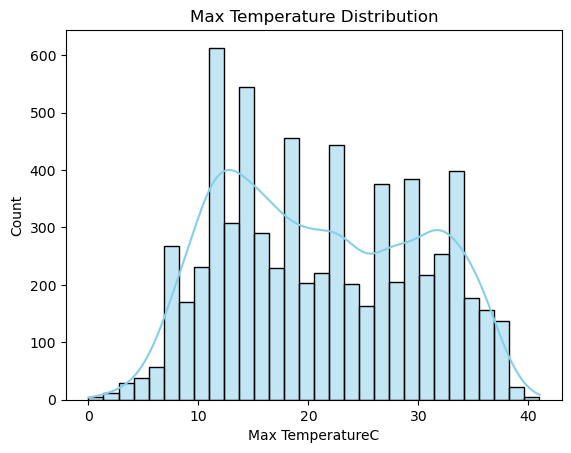

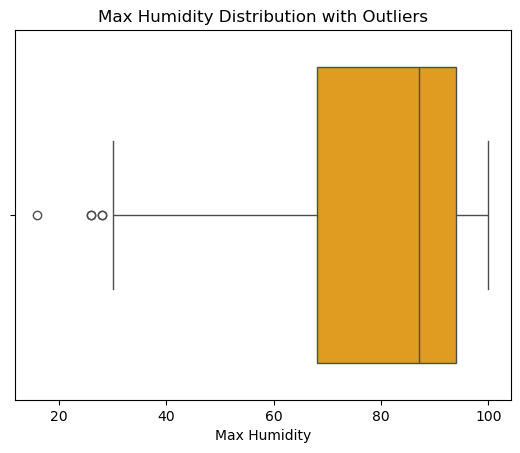

In [9]:
## 6. Univariate Analysis - Numerical Features
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].describe()

# Example Histogram: Max Temperature
sns.histplot(df['Max TemperatureC'], bins=30, kde=True, color='skyblue')
plt.title('Max Temperature Distribution')
plt.show()

# Example Boxplot: Max Humidity
sns.boxplot(x=df['Max Humidity'], color='orange')
plt.title('Max Humidity Distribution with Outliers')
plt.show()


In [11]:
# Check all column names
print(df.columns)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Identify object columns that can be categorical
cat_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", cat_cols)

# Convert object columns to category type
for col in cat_cols:
    df[col] = df[col].astype('category')

# Plot countplots for categorical features
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


Index(['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h',
       'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees'],
      dtype='object')
Categorical columns: Index([], dtype='object')


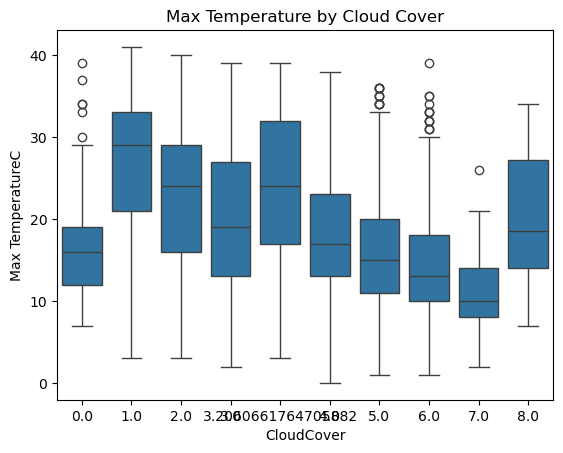

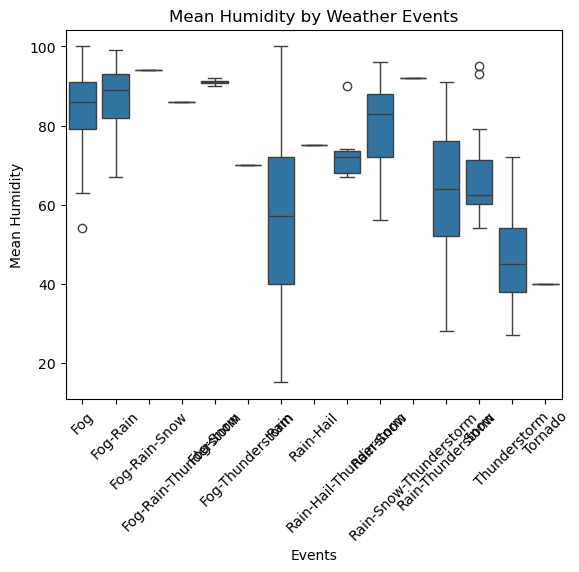

In [12]:
# Example: Numerical vs Categorical for Madrid Weather
# Max Temperature vs Cloud Cover
sns.boxplot(x='CloudCover', y='Max TemperatureC', data=df)
plt.title("Max Temperature by Cloud Cover")
plt.show()

# Mean Humidity vs Events
# Make sure Events column is categorical (some rows may be NaN)
df['Events'] = df['Events'].astype('category')
sns.boxplot(x='Events', y='Mean Humidity', data=df)
plt.title("Mean Humidity by Weather Events")
plt.xticks(rotation=45)
plt.show()


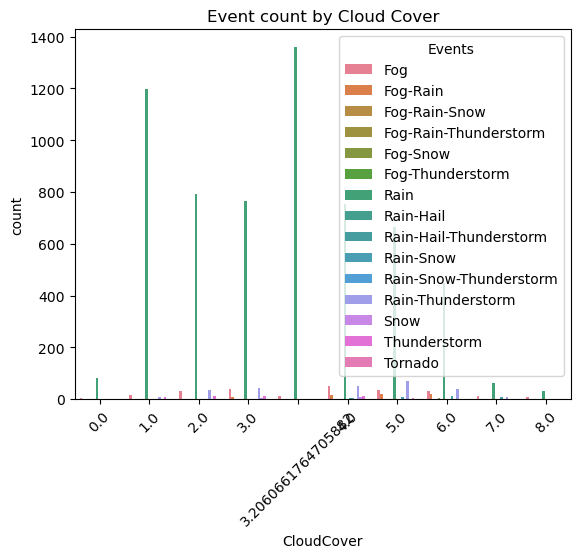

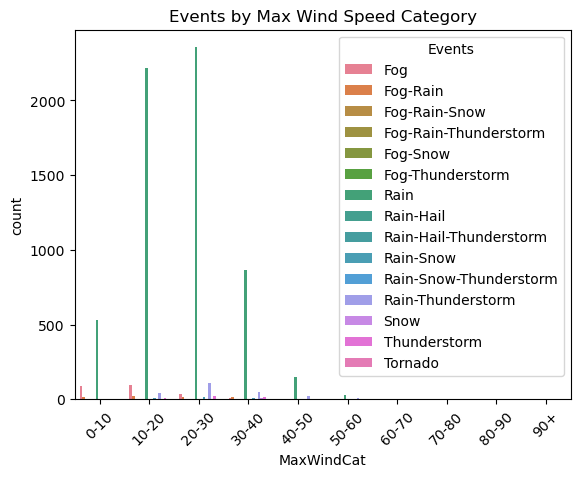

In [13]:
# Convert Events column to category if not already
df['Events'] = df['Events'].astype('category')

# Bivariate Analysis - Categorical vs Categorical
sns.countplot(x='CloudCover', hue='Events', data=df)
plt.title("Event count by Cloud Cover")
plt.xticks(rotation=45)
plt.show()

# Another example: Max Wind Speed category vs Events
# Create a categorical column from Max Wind Speed
df['MaxWindCat'] = pd.cut(df['Max Wind SpeedKm/h'], bins=[0,10,20,30,40,50,60,70,80,90,200],
                           labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90+'])

sns.countplot(x='MaxWindCat', hue='Events', data=df)
plt.title("Events by Max Wind Speed Category")
plt.xticks(rotation=45)
plt.show()


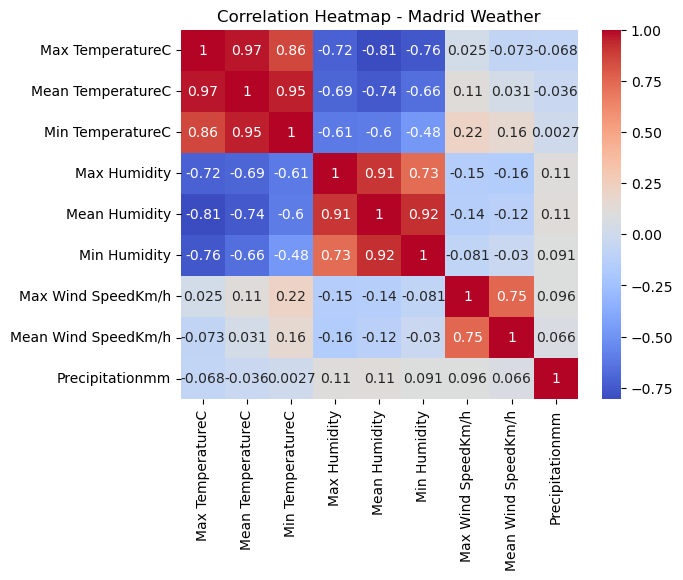

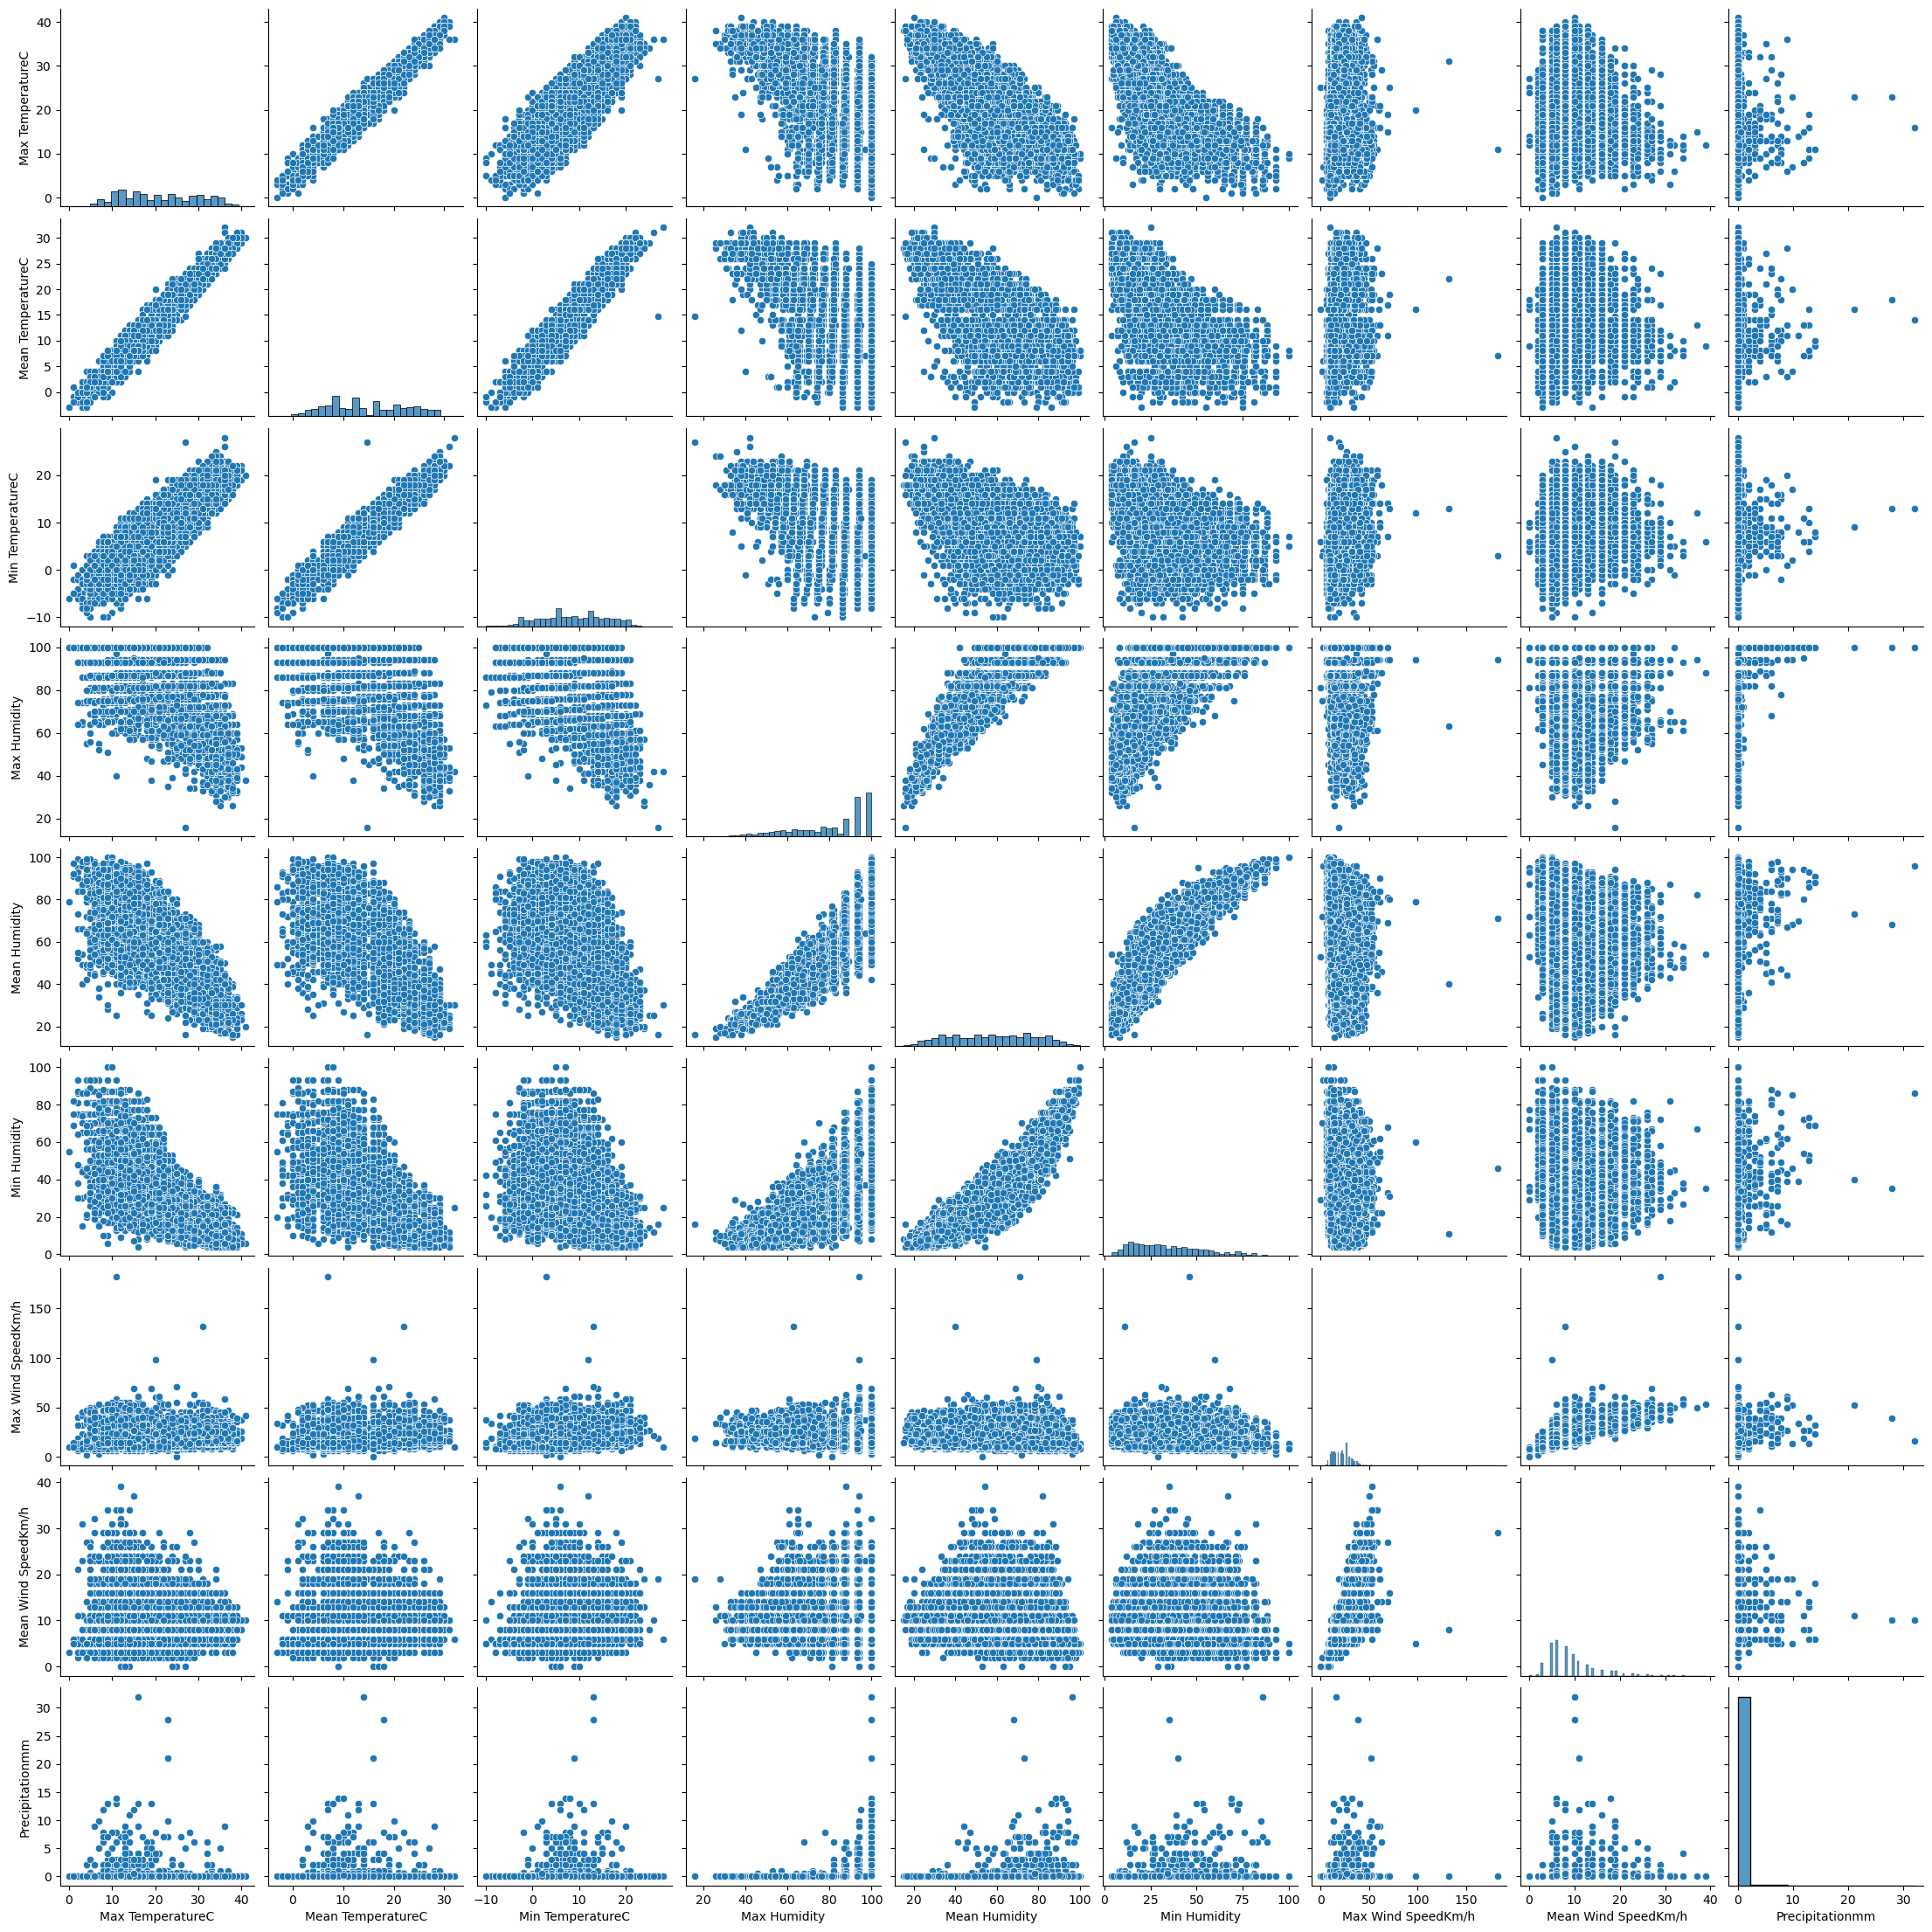

In [14]:
# Correlation for selected numerical features
num_cols = ['Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC', 
            'Max Humidity', 'Mean Humidity', 'Min Humidity', 
            'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Precipitationmm']

corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Madrid Weather")
plt.show()

# Pairplot for numerical features
sns.pairplot(df[num_cols])
plt.show()


### Insights: 

1.Maximum, mean, and minimum temperatures are highly positively correlated, indicating consistent daily temperature trends.

2.Wind speeds show a slight positive correlation with precipitation, suggesting windier days may coincide with more rainfall.

3.Humidity measures (max, mean, min) are also strongly correlated, reflecting stable moisture patterns during the day.

Number of outliers in Max TemperatureC: 0


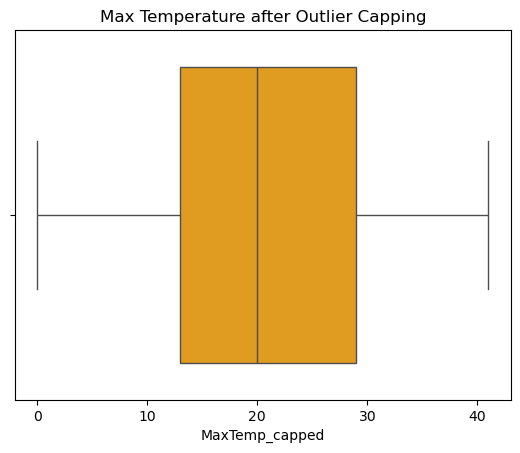

In [15]:
# Outlier Detection using IQR for Max Temperature
Q1 = df['Max TemperatureC'].quantile(0.25)
Q3 = df['Max TemperatureC'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Max TemperatureC'] < lower) | (df['Max TemperatureC'] > upper)]
print("Number of outliers in Max TemperatureC:", len(outliers))

# Cap outliers
df['MaxTemp_capped'] = df['Max TemperatureC'].clip(lower, upper)
sns.boxplot(x=df['MaxTemp_capped'], color='orange')
plt.title('Max Temperature after Outlier Capping')
plt.show()


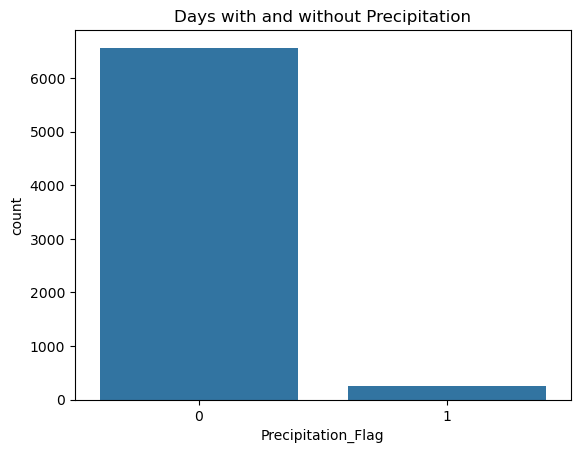

,Temp_Range,DewPoint_Range,Humidity_Range,Precipitation_Flag
0,5.0,3.0,24.0,0
1,7.0,6.0,29.0,0
2,3.0,6.0,30.0,0
3,8.0,2.0,37.0,0
4,3.0,5.0,14.0,0


In [16]:
# Feature Engineering for weather dataset

# Temperature Range
df['Temp_Range'] = df['Max TemperatureC'] - df['Min TemperatureC']

# Dew Point Range
df['DewPoint_Range'] = df['Dew PointC'] - df['Min DewpointC']

# Humidity Range
df['Humidity_Range'] = df['Max Humidity'] - df['Min Humidity']

# Precipitation Flag (1 if precipitation > 0, else 0)
df['Precipitation_Flag'] = (df['Precipitationmm'] > 0).astype(int)

# Quick visualization example
sns.countplot(x='Precipitation_Flag', data=df)
plt.title("Days with and without Precipitation")
plt.show()

df[['Temp_Range','DewPoint_Range','Humidity_Range','Precipitation_Flag']].head()


In [17]:
# Export the cleaned Madrid weather data
df.to_csv("madrid_weather_cleaned.csv", index=False)
print("\nCleaned Madrid weather data saved as madrid_weather_cleaned.csv")



Cleaned Madrid weather data saved as madrid_weather_cleaned.csv


In [18]:
import os
print(os.getcwd())

c:\Users\aksha\Desktop\AI&DS TRAINING\Data Analysis\EDA on 5 datasets
